In [1]:
import numpy as np
import pyJHTDB
from pyJHTDB.dbinfo import channel, isotropic1024coarse, mhd1024
from pyJHTDB.test import test_local_vs_db_interp

npoints = 2**12

#Add token
auth_token  = "edu.jhu.pha.turbulence.testing-201311" #Replace with your own token here

(res0,
 res1,
 resd0,
 resd1) = test_local_vs_db_interp(
            info = channel,
            m = 1,
            q = 4,
            npoints = npoints,
            dbinterp = [8, 44],
            start = np.array([0, 0, 0], dtype = np.int),
            width = np.array([91, 67, 31], dtype = np.int),
            messages_on = False,
            token = auth_token)

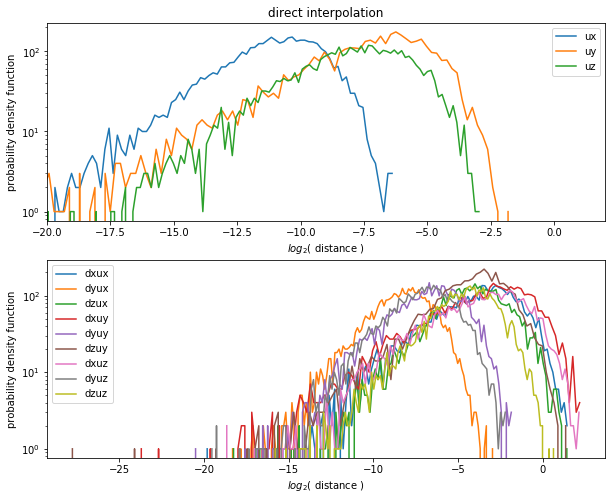

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt


comp0 = ['ux', 'uy', 'uz']
comp1 = ['dxux', 'dyux', 'dzux',
         'dxuy', 'dyuy', 'dzuy',
         'dxuz', 'dyuz', 'dzuz']

nbins = int(npoints / 32)

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(211)
ax.set_title('direct interpolation')
ax.set_xlim(-20, 2)
ax.set_yscale('log')
for i in range(3):
    hist, bins = np.histogram(
                    np.log2(np.abs(res0[:, i] - res1[:, i]) / 
                     np.average(np.abs(res0[:, i]))),
                    bins = nbins)
    ax.plot(.5*(bins[1:] + bins[:-1]),
            hist,
            label = comp0[i])
ax.set_xlabel('$log_2($ distance $)$')
ax.set_ylabel('probability density function')
ax.legend(loc = 'best')
ax = fig.add_subplot(212)
for i in range(9):
    hist, bins = np.histogram(
                    np.log2(np.abs(resd0[:, i] - resd1[:, i]) / 
                     np.average(np.abs(resd0[:, i]))),
                    bins = nbins)
    ax.plot(.5*(bins[1:] + bins[:-1]),
            hist,
            label = comp1[i])
ax.set_xlabel('$log_2($ distance $)$')
ax.set_ylabel('probability density function')
ax.set_yscale('log')
ax.legend(loc = 'best')